<a href="https://colab.research.google.com/github/dileepchandhra/SENTIMENT-ANALYSIS/blob/main/SMART_KNOWER_MAJOR_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow import keras

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [9]:
x_text_model = df.iloc[:,0].values
y_text_model = df.iloc[:,1].values
print(x_text_model)
print(y_text_model)


['It was nice produt I like its design a lot  Its easy to carry And   Looked stylishREAD MORE'
 'awesome soundvery pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE'
 'awesome sound quality pros 78 hrs of battery life including 45 mins approx call timeAwesome sound output Bass and treble are really very clear without equaliser With equaliser sound wary depends on the handset sound qualityWeightless to carry and in head tooMic is good but in traffic it is not too good 325535mm Option is really important to mention Really expecting other leading brands to implement thisConsVery tight in ears adjusters are ok  this ll be very tightREAD MORE'
 ... 'GoodREAD MORE' 'Best headphone i have ever usedREAD MORE'
 'NiceREAD MORE']
[5 5 4 ... 5 5 5]


In [11]:
x_train_text_model,x_test_text_model,y_train_text_model,y_test_text_model = train_test_split(x_text_model ,y_text_model,test_size = 0.25,random_state = 0,stratify = y_text_model)

In [12]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['review'] = df['review'].apply(remove_punctuations)
df

,review,rating
0,It was nice produt I like its design a lot It...,5
1,awesome soundvery pretty to see this nd the so...,5
2,awesome sound quality pros 78 hrs of battery l...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever usedREAD MORE,5


In [13]:

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
tokenizer=RegexpTokenizer(r'\w+')
df['review']=df['review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['review']

0       [it, was, nice, produt, i, like, its, design, ...
1       [awesome, soundvery, pretty, to, see, this, nd...
2       [awesome, sound, quality, pros, 78, hrs, of, b...
3       [i, think, it, is, such, a, good, product, not...
4       [awesome, bass, sound, quality, very, good, be...
                              ...                        
9971                                     [goodread, more]
9972    [everything, is, amazimg, but, the, built, is,...
9973                                     [goodread, more]
9974     [best, headphone, i, have, ever, usedread, more]
9975                                     [niceread, more]
Name: review, Length: 9976, dtype: object

In [15]:
# def removestopwords(s):
#   words=[i for i in s if i not in stopwords.words('english')]
#   print(words)
#   return words

# df['review']=df['review'].apply(lambda x: removestopwords(x))
# df['review']

# #takes lots of time here so be patient here

In [16]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values
print(x)
print(y)

[list(['it', 'was', 'nice', 'produt', 'i', 'like', 'its', 'design', 'a', 'lot', 'its', 'easy', 'to', 'carry', 'and', 'looked', 'stylishread', 'more'])
 list(['awesome', 'soundvery', 'pretty', 'to', 'see', 'this', 'nd', 'the', 'sound', 'quality', 'was', 'too', 'good', 'i', 'wish', 'to', 'take', 'this', 'product', 'loved', 'this', 'product', 'read', 'more'])
 list(['awesome', 'sound', 'quality', 'pros', '78', 'hrs', 'of', 'battery', 'life', 'including', '45', 'mins', 'approx', 'call', 'timeawesome', 'sound', 'output', 'bass', 'and', 'treble', 'are', 'really', 'very', 'clear', 'without', 'equaliser', 'with', 'equaliser', 'sound', 'wary', 'depends', 'on', 'the', 'handset', 'sound', 'qualityweightless', 'to', 'carry', 'and', 'in', 'head', 'toomic', 'is', 'good', 'but', 'in', 'traffic', 'it', 'is', 'not', 'too', 'good', '325535mm', 'option', 'is', 'really', 'important', 'to', 'mention', 'really', 'expecting', 'other', 'leading', 'brands', 'to', 'implement', 'thisconsvery', 'tight', 'in', 'ea

In [18]:
len(x)

9976

In [19]:
def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  

x = vectorizer.fit_transform(x)

In [20]:
x = x.toarray()

In [21]:
x.shape

(9976, 9932)

In [22]:


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0,stratify = y)

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7482, 9932)
(7482,)
(2494, 9932)
(2494,)


In [24]:
np.unique(y_train)

array([1, 2, 3, 4, 5])

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [26]:
text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',SVC())]) 

In [27]:
text_model.fit(x_train_text_model,y_train_text_model)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', d

In [28]:
y_pred = text_model.predict(x_test_text_model)
y_pred

array([5, 3, 4, ..., 5, 5, 5])

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred,y_test_text_model)*100

65.35685645549319

In [30]:
confusion_matrix(y_pred,y_test_text_model)

array([[ 104,   16,   20,    8,    1],
       [   1,    4,    0,    0,    0],
       [  12,   16,   37,   15,    5],
       [  13,   13,   57,  146,   86],
       [  43,   29,  107,  422, 1339]])

In [31]:
# print(classification_report(y_pred,y_test))

In [32]:
# text_model.predict(["Very bad product.  Within 5 days it's mic was out of work. I am very disappointed tobuythisproduct. I will never suggest to anyone for buying this product."])

In [33]:
y_train_1 = keras.utils.to_categorical(y_train)
y_test_1 = keras.utils.to_categorical(y_test)

In [34]:
y_train_1 = y_train_1[:, 1:]
y_test_1 = y_test_1[:, 1:]

In [35]:
model = keras.models.Sequential([keras.layers.BatchNormalization(input_dim=x_train.shape[1]),
                                 keras.layers.Dense(100,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Dense(50,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(5, "softmax"),
                                 ])

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 9932)              39728     
_________________________________________________________________
dense (Dense)                (None, 100)               993300    
_________________________________________________________________
p_re_lu (PReLU)              (None, 100)               100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 50)                5

In [37]:
history = model.fit(x_train, y_train_1, validation_data=(x_test, y_test_1), epochs=50, callbacks=[early_stopping_cb])

Epoch 1/50
234/234 [==============================] - 6s 20ms/step - loss: 1.5786 - accuracy: 0.4410 - val_loss: 1.1296 - val_accuracy: 0.5878
Epoch 2/50
234/234 [==============================] - 4s 17ms/step - loss: 0.7362 - accuracy: 0.7364 - val_loss: 0.9874 - val_accuracy: 0.6207
Epoch 3/50
234/234 [==============================] - 4s 17ms/step - loss: 0.5412 - accuracy: 0.8073 - val_loss: 1.2415 - val_accuracy: 0.5998
Epoch 4/50
234/234 [==============================] - 4s 19ms/step - loss: 0.4564 - accuracy: 0.8384 - val_loss: 1.4412 - val_accuracy: 0.5998
Epoch 5/50
234/234 [==============================] - 4s 19ms/step - loss: 0.4033 - accuracy: 0.8508 - val_loss: 1.5893 - val_accuracy: 0.5958
Epoch 6/50
234/234 [==============================] - 4s 16ms/step - loss: 0.3692 - accuracy: 0.8661 - val_loss: 1.7356 - val_accuracy: 0.5277
Epoch 7/50
234/234 [==============================] - 4s 17ms/step - loss: 0.3700 - accuracy: 0.8611 - val_loss: 1.7513 - val_accuracy: 0.5958

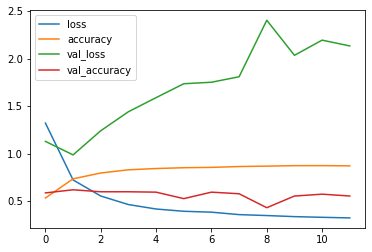

In [38]:

import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot();

In [39]:
!pip install streamlit
!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 7.5MB 5.6MB/s 
     |████████████████████████████████| 163kB 51.4MB/s 
     |████████████████████████████████| 112kB 48.6MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 4.6MB 37.8MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 122kB 49.8MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=45401788a1efe7974dd300fc9fab9a26afe31723da36716178026cacabda64e8
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.0 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15971 sha256=6f03c0cb6ee390f6eacbbf41181305e505649ab8b94f848e599b71c649691f6e
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [40]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow import keras

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/data.csv')

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['review'] = df['review'].apply(remove_punctuations)

tokenizer=RegexpTokenizer(r'\w+')
df['review']=df['review'].apply(lambda x: tokenizer.tokenize(x.lower()))

def removestopwords(s):
  words=[i for i in s if i not in stopwords.words('english')]
  print(words)
  return words

x = df.iloc[:,0].values
y = df.iloc[:,1].values

def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  

x = vectorizer.fit_transform(x)
x = x.toarray()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.05,random_state = 0,stratify = y)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# y = keras.utils.to_categorical(y)
# y = y[:, 1:]

y_train = y_train[:, 1:]
y_test = y_test[:, 1:]

model = keras.models.Sequential([keras.layers.BatchNormalization(input_dim=x_train.shape[1]),
                                 keras.layers.Dense(100,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Dense(50,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(5, "softmax"),
                                 ])

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics="accuracy")

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train,validation_data=(x_test,y_test),
                    epochs=50, callbacks=[early_stopping_cb])

st.title('sentiment analysis')
select = st.text_input('Enter your message')

select = remove_punctuations(select)
select = tokenizer.tokenize(select.lower())

select = vectorizer.transform([select]).toarray()
output = np.argmax(model.predict(select), axis=-1)

st.title(output[0])


Writing app.py


In [41]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://fcf2a2e1c8b3.ngrok.io'

In [44]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
 
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
 
df['review'] = df['review'].apply(remove_punctuations)
 
tokenizer=RegexpTokenizer(r'\w+')
df['review']=df['review'].apply(lambda x: tokenizer.tokenize(x.lower()))
 
def removestopwords(s):
  words=[i for i in s if i not in stopwords.words('english')]
  print(words)
  return words
 
x = df.iloc[:,0].values
y = df.iloc[:,1].values
 
def dummy_fun(doc):
    return doc
 
vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  
 
x = vectorizer.fit_transform(x)
x = x.toarray()
 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.05,random_state = 0,stratify = y)
 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
 
# y = keras.utils.to_categorical(y)
# y = y[:, 1:]
 
y_train = y_train[:, 1:]
y_test = y_test[:, 1:]
 
model = keras.models.Sequential([keras.layers.BatchNormalization(input_dim=x_train.shape[1]),
                                 keras.layers.Dense(100,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Dense(50,kernel_initializer="he_normal"),
                                 keras.layers.PReLU(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(5, "softmax"),
                                 ])
 
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics="accuracy")
 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
 
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=50, callbacks=[early_stopping_cb])

Epoch 1/50
297/297 [==============================] - 6s 18ms/step - loss: 1.5035 - accuracy: 0.4673 - val_loss: 1.1073 - val_accuracy: 0.5752
Epoch 2/50
297/297 [==============================] - 5s 17ms/step - loss: 0.7314 - accuracy: 0.7344 - val_loss: 1.0324 - val_accuracy: 0.6313
Epoch 3/50
297/297 [==============================] - 5s 17ms/step - loss: 0.5487 - accuracy: 0.8018 - val_loss: 1.4055 - val_accuracy: 0.5852
Epoch 4/50
297/297 [==============================] - 5s 16ms/step - loss: 0.4561 - accuracy: 0.8318 - val_loss: 1.5377 - val_accuracy: 0.6072
Epoch 5/50
297/297 [==============================] - 5s 18ms/step - loss: 0.4199 - accuracy: 0.8429 - val_loss: 1.8177 - val_accuracy: 0.5731
Epoch 6/50
297/297 [==============================] - 5s 17ms/step - loss: 0.3940 - accuracy: 0.8469 - val_loss: 1.9999 - val_accuracy: 0.4910
Epoch 7/50
297/297 [==============================] - 5s 17ms/step - loss: 0.3823 - accuracy: 0.8550 - val_loss: 1.9215 - val_accuracy: 0.5852